In [2]:
import qiskit as q
%matplotlib inline

# 2 quibits and 2 classical bits
circuit = q.QuantumCircuit(2, 2)

# Adding a gate
# 0, 0
circuit.x(0) # NOT gate
# 1, 0
circuit.cx(0, 1) # Controlled NOT gate Basically a EXOR
# 1, 1

circuit.measure([0,1], [0,1])
circuit.draw()

In [3]:
from qiskit import IBMQ
IBMQ.save_account(open('token.txt', 'r').read()) # Required only once to login

c:\users\shaki\anaconda3\envs\qbit\lib\site-packages\qiskit\providers\ibmq\credentials\configrc.py:130: UserWarning: Credentials already present. Set overwrite=True to overwrite.
  warnings.warn('Credentials already present. '


In [4]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [5]:
provider = IBMQ.get_provider('ibm-q')

for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = 'simulated'
        
    print(f'{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits')

ibmq_qasm_simulator has 0 queued and simulated qubits
ibmqx2 has 10 queued and 5 qubits
ibmq_16_melbourne has 108 queued and 14 qubits
ibmq_vigo has 5 queued and 5 qubits
ibmq_ourense has 15 queued and 5 qubits
ibmq_london has 11 queued and 5 qubits
ibmq_burlington has 3 queued and 5 qubits
ibmq_essex has 3 queued and 5 qubits


In [6]:
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend('ibmq_burlington')
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


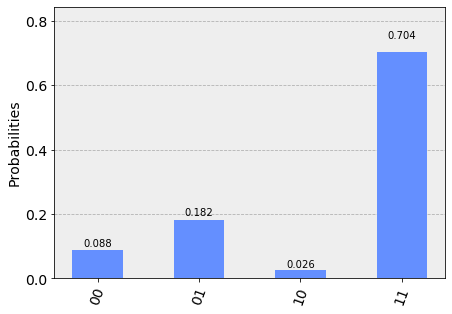

In [7]:
from qiskit.visualization import plot_histogram

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

In [15]:
backend = provider.get_backend('ibmq_qasm_simulator')

# 2 quibits and 2 classical bits
circuit = q.QuantumCircuit(2, 2)

# Adding a gate
# 0, 0
circuit.h(0) # H Gate
# 1, 0
circuit.cx(0, 1)
# 1, 1

circuit.measure([0,1], [0,1])
circuit.draw()

In [16]:
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


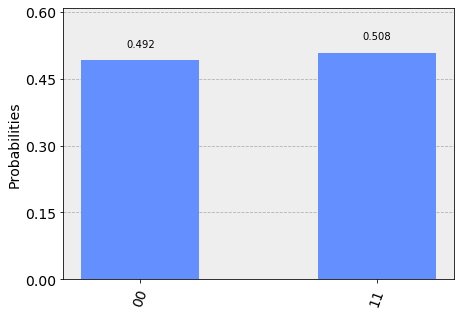

In [17]:
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

In [18]:
from qiskit import Aer 

sim_backend = Aer.get_backend('qasm_simulator')

for backend in Aer.backends():
    print(backend)

qasm_simulator
statevector_simulator
unitary_simulator


Job Status: job has successfully run


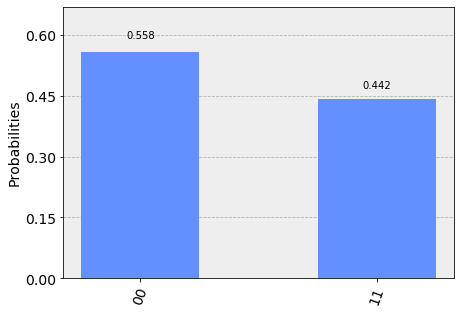

In [19]:
job = q.execute(circuit, backend=sim_backend, shots=500)
job_monitor(job)

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])